# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there are some cities with over 25 mph of wind.

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls



In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#create a storage location
temp = []
humidity = []
cloudy = []
wind_speed = []
lat = []
lng = []
country = []
date = []
city_name = []
count = 0

for city in cities:
    response = requests.get(query_url + city).json()
    count += 1
    print(f'Processing Record {count} | For {city}')
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
    except KeyError:
          print('City not found. Skipping...')

Processing Record 1 | For butaritari
Processing Record 2 | For punta arenas
Processing Record 3 | For nikolskoye
Processing Record 4 | For kamyshla
Processing Record 5 | For cape town
Processing Record 6 | For ukiah
Processing Record 7 | For hobart
Processing Record 8 | For tuktoyaktuk
Processing Record 9 | For hamilton
Processing Record 10 | For mehamn
Processing Record 11 | For atuona
Processing Record 12 | For carnarvon
Processing Record 13 | For pavda
City not found. Skipping...
Processing Record 14 | For taolanaro
City not found. Skipping...
Processing Record 15 | For coahuayana
Processing Record 16 | For dikson
Processing Record 17 | For rikitea
Processing Record 18 | For mataura
Processing Record 19 | For kayerkan
Processing Record 20 | For ushuaia
Processing Record 21 | For agara
Processing Record 22 | For bantogon
Processing Record 23 | For shirokiy
Processing Record 24 | For avarua
Processing Record 25 | For hermanus
Processing Record 26 | For vaini
Processing Record 27 | For

Processing Record 209 | For bethel
Processing Record 210 | For poum
Processing Record 211 | For rongcheng
Processing Record 212 | For syracuse
Processing Record 213 | For tabiauea
City not found. Skipping...
Processing Record 214 | For zarubino
Processing Record 215 | For penzance
Processing Record 216 | For neepawa
Processing Record 217 | For ribeira grande
Processing Record 218 | For george
Processing Record 219 | For amderma
City not found. Skipping...
Processing Record 220 | For adrar
Processing Record 221 | For klyuchi
Processing Record 222 | For qasigiannguit
Processing Record 223 | For zharkent
Processing Record 224 | For lata
Processing Record 225 | For hihifo
City not found. Skipping...
Processing Record 226 | For te anau
Processing Record 227 | For hurghada
City not found. Skipping...
Processing Record 228 | For norman wells
Processing Record 229 | For kurilsk
Processing Record 230 | For samusu
City not found. Skipping...
Processing Record 231 | For alyangula
Processing Recor

Processing Record 410 | For amuntai
Processing Record 411 | For ostrovnoy
Processing Record 412 | For sibolga
Processing Record 413 | For baoding
Processing Record 414 | For beringovskiy
Processing Record 415 | For provideniya
Processing Record 416 | For lavrentiya
Processing Record 417 | For opuwo
Processing Record 418 | For mezen
Processing Record 419 | For acarau
City not found. Skipping...
Processing Record 420 | For merrill
Processing Record 421 | For san blas
Processing Record 422 | For leningradskiy
Processing Record 423 | For vostok
Processing Record 424 | For leavenworth
Processing Record 425 | For talah
City not found. Skipping...
Processing Record 426 | For patrocinio
Processing Record 427 | For coihaique
Processing Record 428 | For svetlaya
Processing Record 429 | For porto novo
Processing Record 430 | For quatre cocos
Processing Record 431 | For starovelichkovskaya
Processing Record 432 | For romny
Processing Record 433 | For laguna
Processing Record 434 | For tupiza
Proce

### Convert Raw Data to DataFrame


In [4]:
weather_data  = pd.DataFrame({'City': city_name, 'Country': country, 'Date':date,
                              'Cloudiness (%)': cloudy, 'Humidity (%)': humidity, 'Lat': lat,
                             'Lng': lng, 'Max Temp (F)': temp, 'Wind Speed (mph)': wind_speed})
weather_data.to_csv(output_data_file)

In [5]:
weather_data.head()

,City,Country,Date,Cloudiness (%),Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,Butaritari,KI,1553985594,20,100,3.07,172.79,83.62,23.29
1,Punta Arenas,CL,1553985147,75,71,-53.16,-70.91,53.60,17.22
2,Nikolskoye,RU,1553985036,90,86,59.70,30.79,39.99,2.24
3,Kamyshla,RU,1553985595,92,92,54.11,52.14,31.60,12.55
4,Cape Town,ZA,1553985379,75,77,-33.93,18.42,66.00,11.41


In [6]:
weather_data.dtypes

City                 object
Country              object
Date                  int64
Cloudiness (%)        int64
Humidity (%)          int64
Lat                 float64
Lng                 float64
Max Temp (F)        float64
Wind Speed (mph)    float64
dtype: object

#### Latitude vs. Temperature Plot

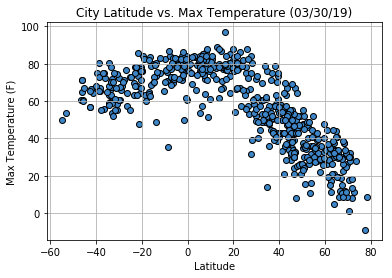

In [7]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp (F)'], color = '#3C85C7', edgecolors='black')
plt.title('City Latitude vs. Max Temperature (03/30/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('output_data/latitude_vs_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

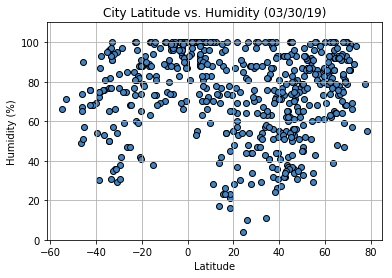

In [8]:
plt.scatter(weather_data['Lat'], weather_data['Humidity (%)'], color = '#3C85C7', edgecolors='black')
plt.title('City Latitude vs. Humidity (03/30/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 100+10)
plt.grid()
plt.savefig('output_data/latitude_vs_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

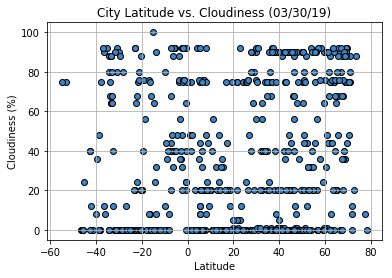

In [9]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness (%)'], color = '#3C85C7', edgecolors='black')
plt.title('City Latitude vs. Cloudiness (03/30/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('output_data/latitude_vs_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

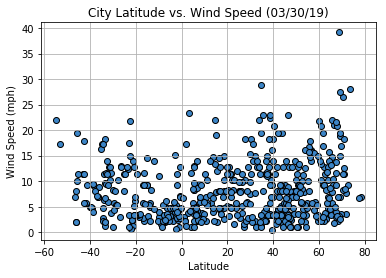

In [10]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed (mph)'], color = '#3C85C7', edgecolors='black')
plt.title('City Latitude vs. Wind Speed (03/30/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('output_data/latitude_vs_windspeed.png')
plt.show()